In [49]:
import torch

import pandas as pd
import random
import time
from matplotlib import pyplot as plt

import numpy as np
# import scipy

random.seed(time.time())

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

print(torch.cuda.is_available())

device = torch.device("cuda:0")


True


In [50]:
with open('cleaned_data.txt') as f:
    lines = f.readlines()

VINA = [x.split(",")[1] for x in lines]
VINA.pop(0)
VINA = [float(x) for x in VINA]

with open('vectors.txt') as f:
    vectors = f.readlines()

vectors = [v.split() for v in vectors]

for i, v in enumerate(vectors):
    vectors[i] = [float(x) for x in v]


tempshuffle = list(zip(vectors, VINA))
random.shuffle(tempshuffle)

vectors, VINA = zip(*tempshuffle)

print(len(VINA))

# print(vectors[0])
# vectors = [vector[-28:] for vector in vectors]
print(vectors[0])

8231
[1.3407153, -0.5205742, -3.736508, 2.6690462, -0.16376543, 0.9645955, -7.85019, -1.427157, 3.1499104, 1.5637704, -3.1320636, 0.6651988, -3.9144175, 0.7319538, -4.478242, 0.033666298, 2.7065504, -3.2537029, -3.695964, 5.704155, -0.11975896, 4.8137283, 11.347295, 5.2419887, -6.1501427, -1.4520957, -1.9499129, -6.8599153, 0.7368176, 1.2219034, 7.4231257, -3.913327, -3.3121593, -4.571709, 0.5338569, 1.9164526, -0.12889892, -0.4929701, 5.7083926, 1.6986676, -1.3023634, 1.4332576, -2.6883187, 0.892238, -7.527969, 2.9114528, 0.80748624, 5.218942, -4.763412, 3.4410408, 2.461929, -3.6461048, -0.3172903, -6.6327996, -5.1241126, -3.602122, -3.5847323, 0.88314205, 1.291418, 3.757472, -0.9354627, -3.957475, -2.1629171, 2.1234171, -9.769605, 1.0048199, 6.6437182, 0.3578738, -1.6436428, 0.10878232, -2.503233, 2.1422355, 5.8895144, -5.463307, -1.5289965, 4.4327655, -4.716237, 4.875498, -2.1501505, 0.7946042, 4.0126643, -2.451997, -5.197591, -7.0772567, 1.3729708, 0.53510034, -4.9315763, 3.6076572

[0.43703703703703706, 0.37037037037037035, 0.6148148148148148, 0.4, 0.6666666666666666, 0.362962962962963, 0.6, 0.637037037037037, 0.42962962962962964, 0.362962962962963, 0.4666666666666667, 0.5111111111111112, 0.45185185185185184, 0.5851851851851853, 0.5407407407407407, 0.5777777777777777, 0.5111111111111112, 0.5851851851851853, 0.6592592592592593, 0.5111111111111112, 0.6074074074074074, 0.5777777777777777, 0.5111111111111112, 0.7851851851851852, 0.5851851851851853, 0.37777777777777777, 0.48148148148148145, 0.5259259259259259, 0.4888888888888889, 0.688888888888889, 0.5111111111111112, 0.4148148148148148, 0.6222222222222222, 0.6074074074074074, 0.6518518518518519, 0.6444444444444444, 0.5629629629629629, 0.4222222222222222, 0.4888888888888889, 0.34814814814814815, 0.2740740740740741, 0.5481481481481482, 0.6296296296296297, 0.7481481481481481, 0.4740740740740741, 0.5925925925925926, 0.6, 0.674074074074074, 0.6592592592592593, 0.35555555555555557, 0.5777777777777777, 0.5481481481481482, 0

(array([  24.,   35.,  240., 1373., 2337., 2847., 1109.,  202.,   44.,
          20.]),
 array([0.00740741, 0.10666667, 0.20592593, 0.30518519, 0.40444444,
        0.5037037 , 0.60296296, 0.70222222, 0.80148148, 0.90074074,
        1.        ]),
 <a list of 10 Patch objects>)

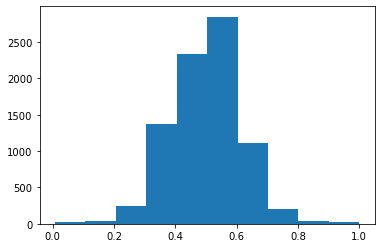

In [51]:
VINA = [v/-13.5 for v in VINA]
print(VINA)
plt.hist(VINA)

In [52]:
dim_input = len(vectors[0])
dim_output = 1

# Define the model and training parameters #
model = torch.nn.Sequential(
          torch.nn.Linear(dim_input, 128),
          torch.nn.ReLU(),
          torch.nn.Linear(128, 128),
          torch.nn.ReLU(),
          torch.nn.Linear(128, 128),
          torch.nn.ReLU(),
          torch.nn.Linear(128, 32),
          torch.nn.ReLU(),
          torch.nn.Linear(32, dim_output),
          torch.nn.Sigmoid()
        )

model.to(device)
loss_fn = torch.nn.MSELoss(reduction="mean")
num_epochs = 100
lr = 1e-3
# lr_decay = 0.99
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train_vectors = torch.FloatTensor(vectors[0:8000]).to(device)
test_vectors = torch.FloatTensor(vectors[8001:len(vectors)-1]).to(device)

train_VINA = torch.FloatTensor(VINA[0:8000]).to(device)
test_VINA = torch.FloatTensor(VINA[8001:len(VINA)-1]).to(device)





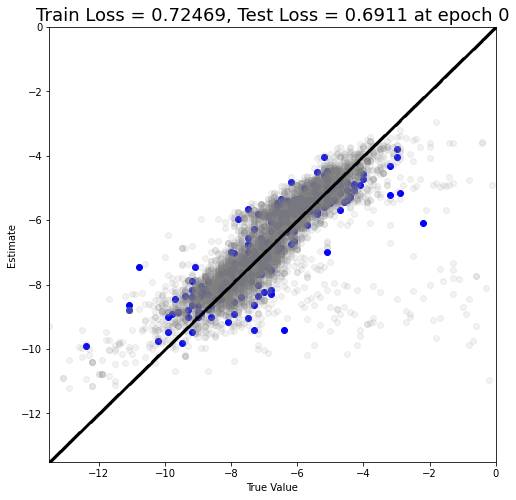

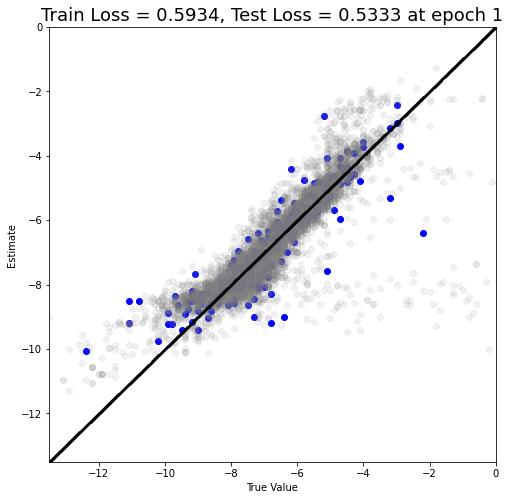

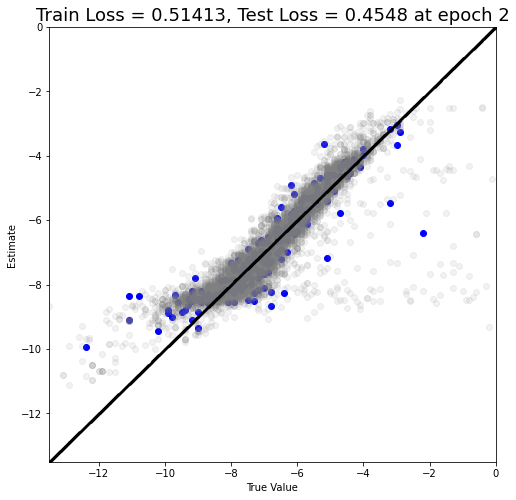

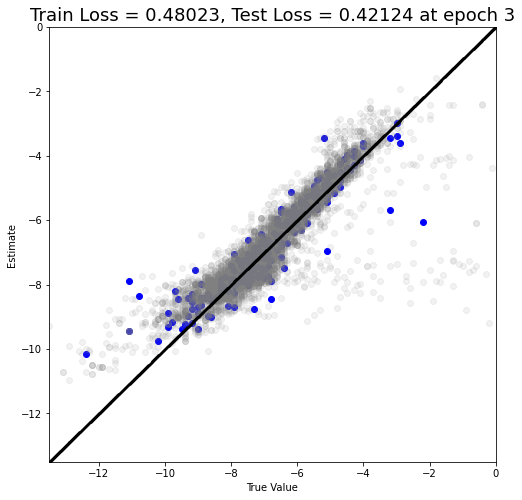

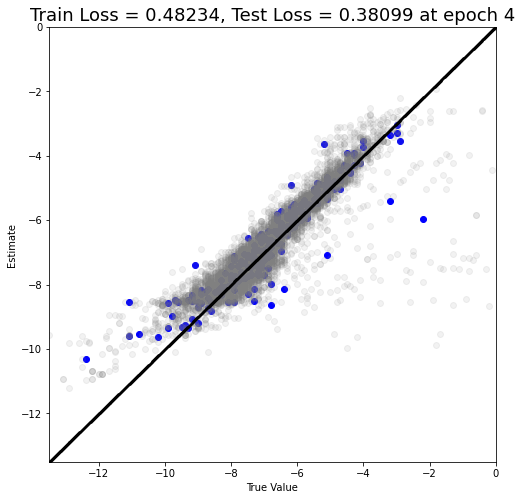

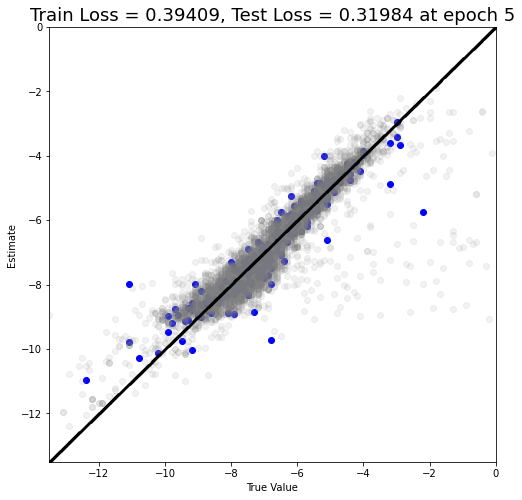

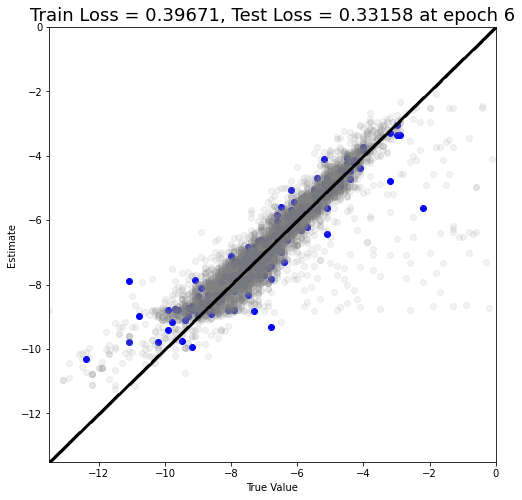

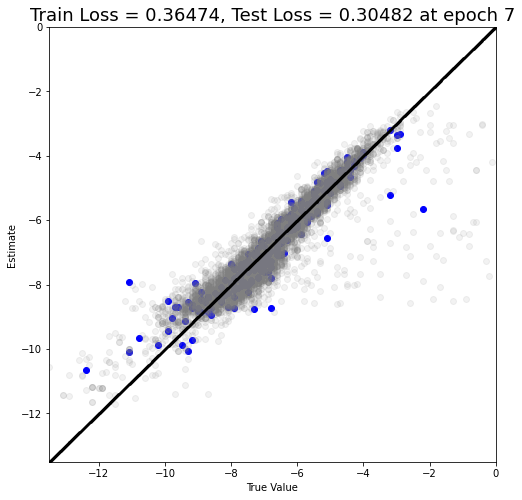

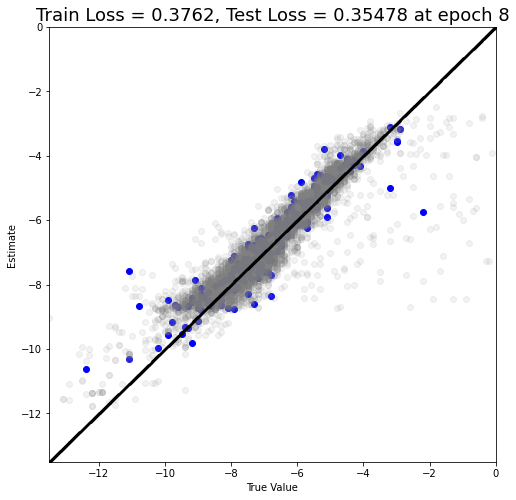

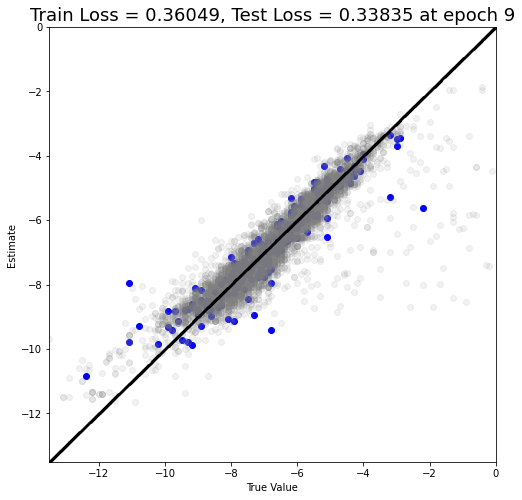

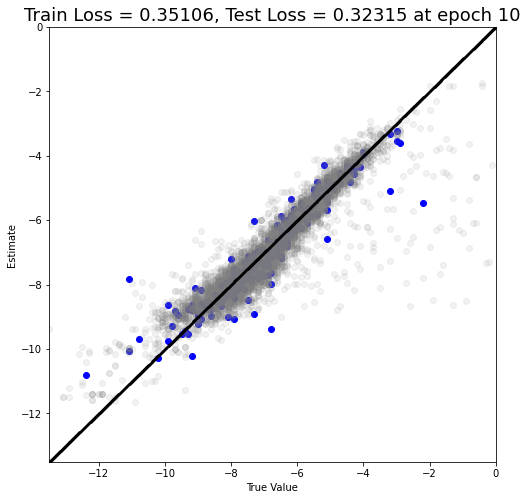

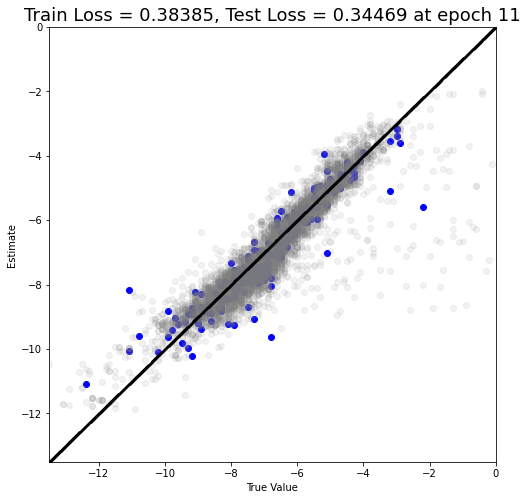

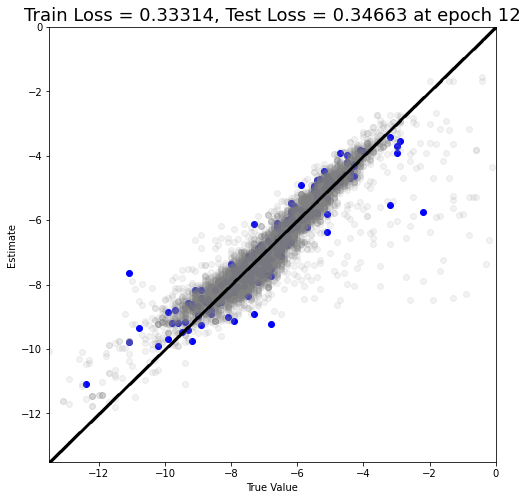

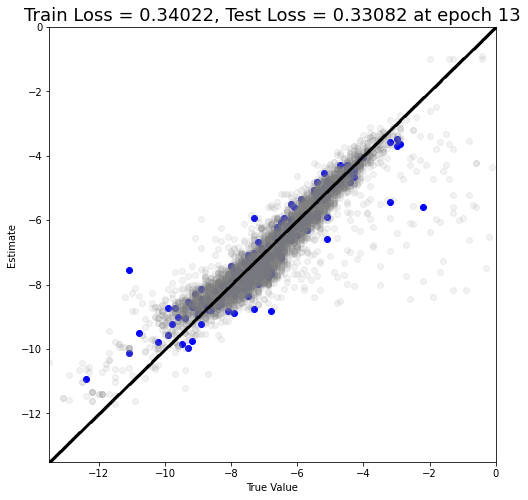

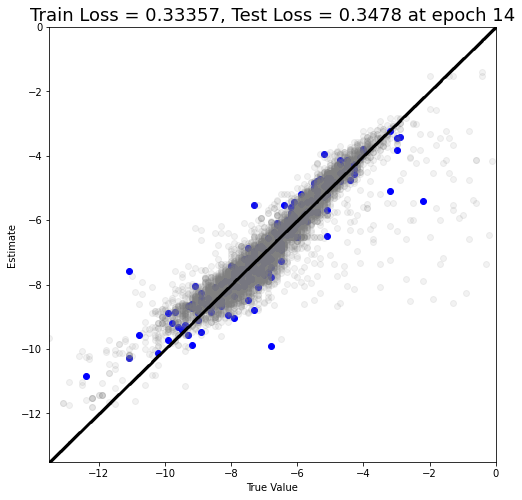

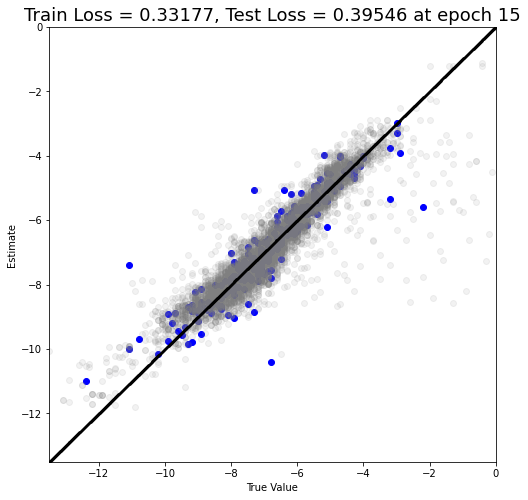

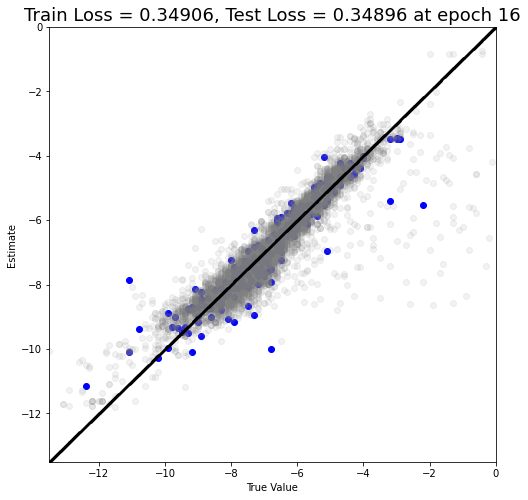

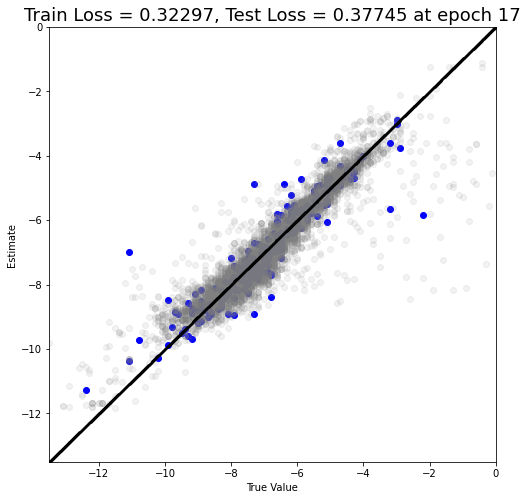

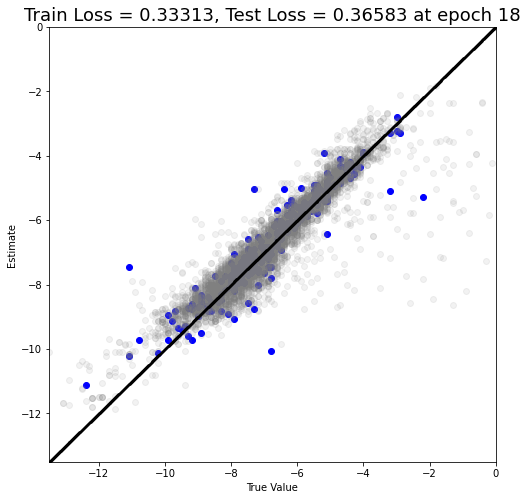

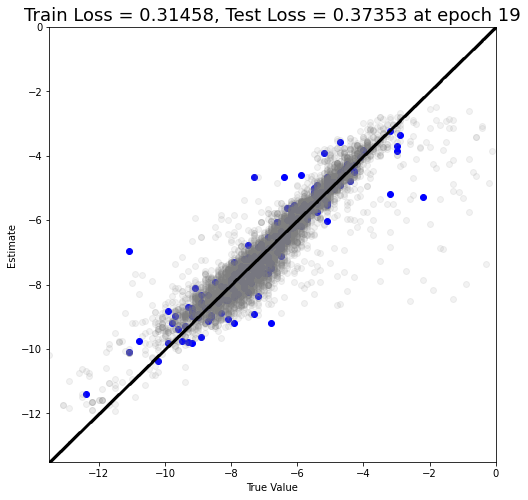

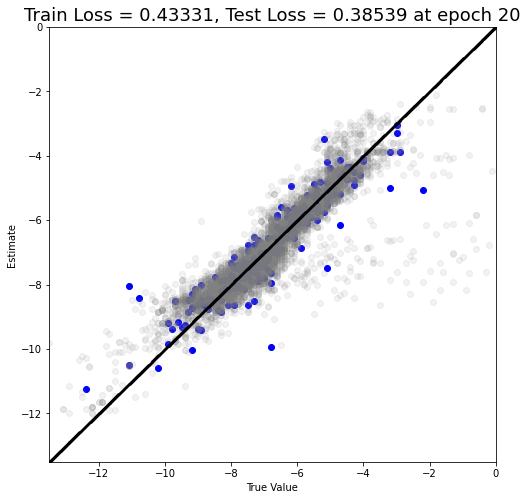

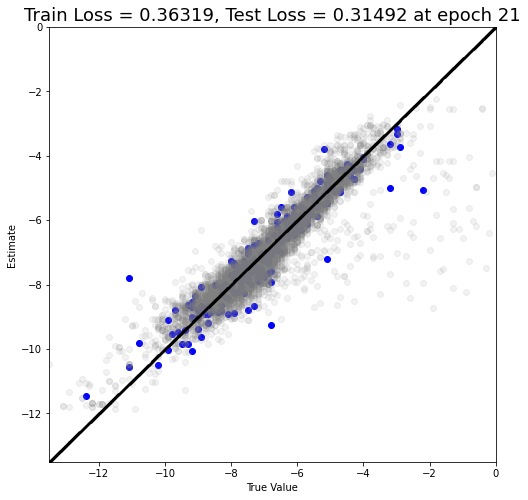

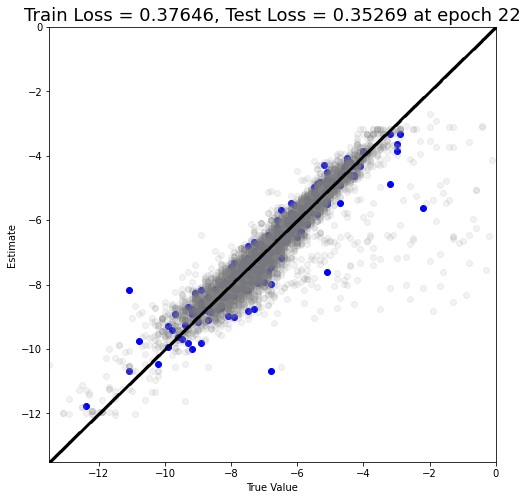

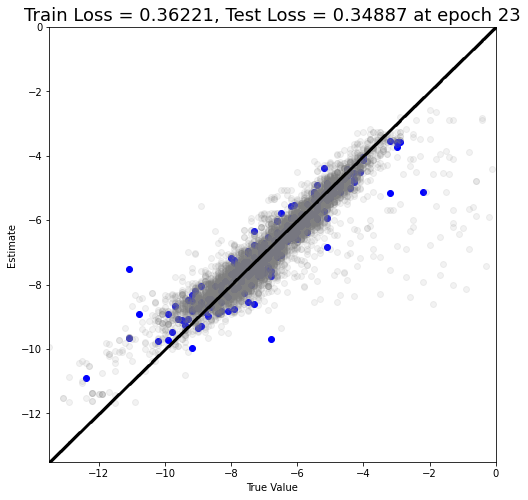

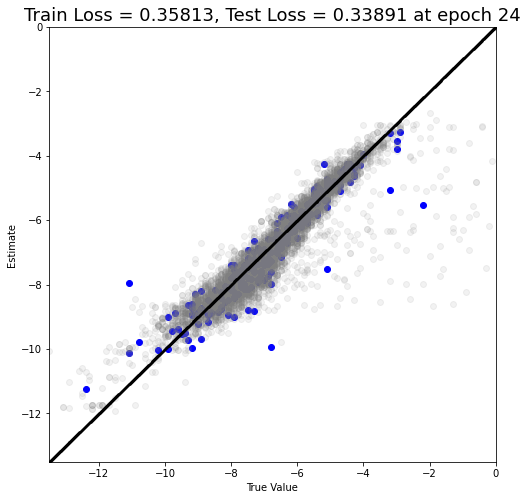

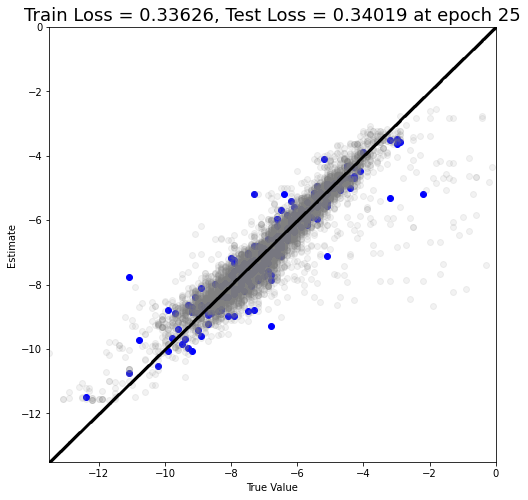

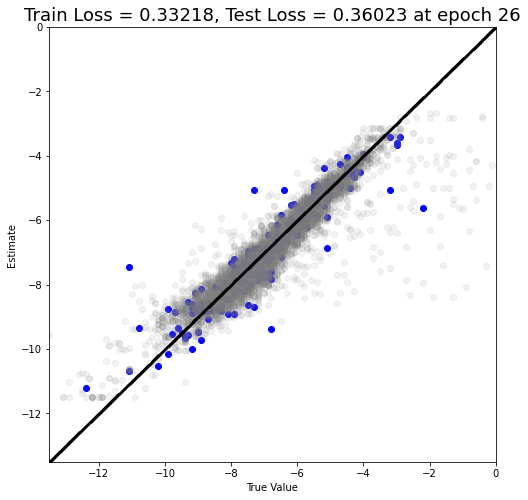

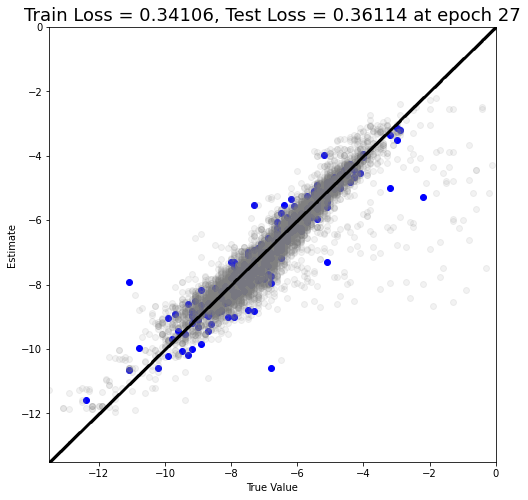

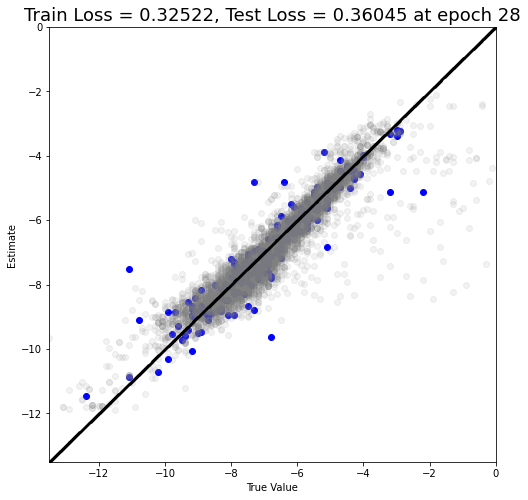

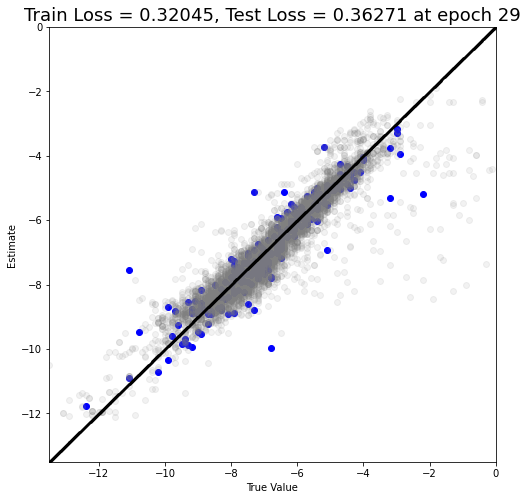

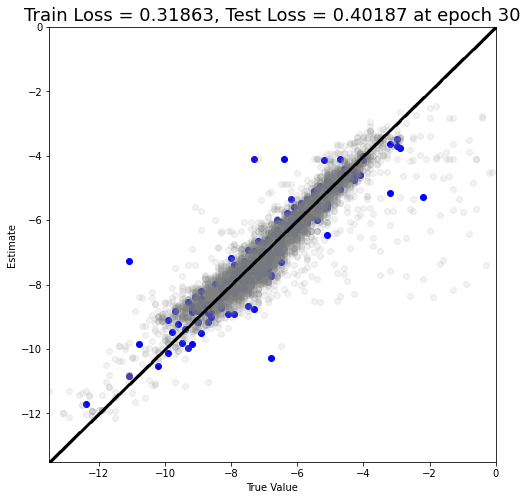

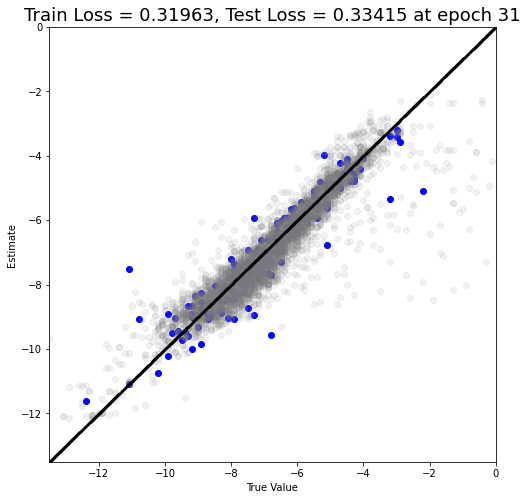

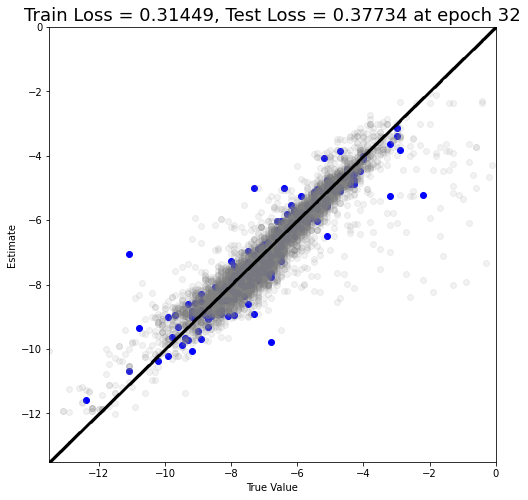

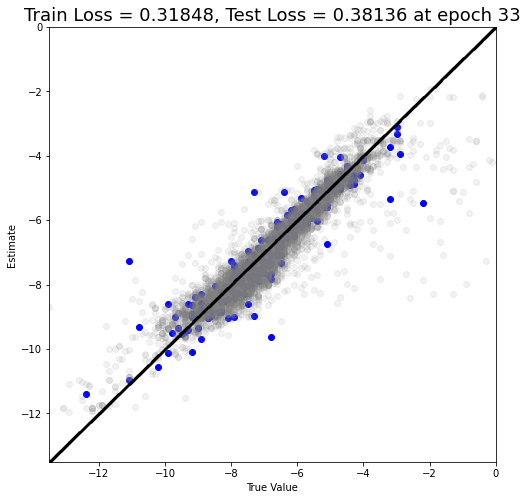

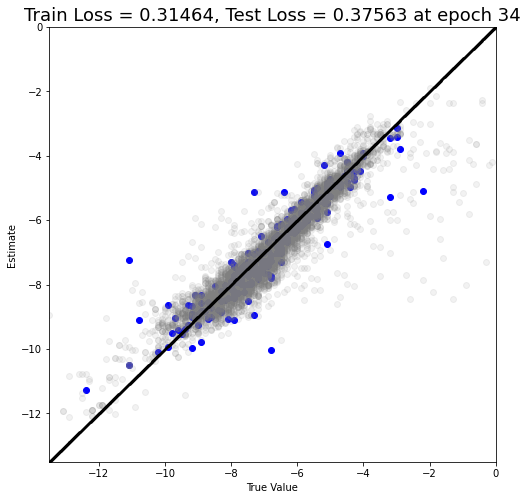

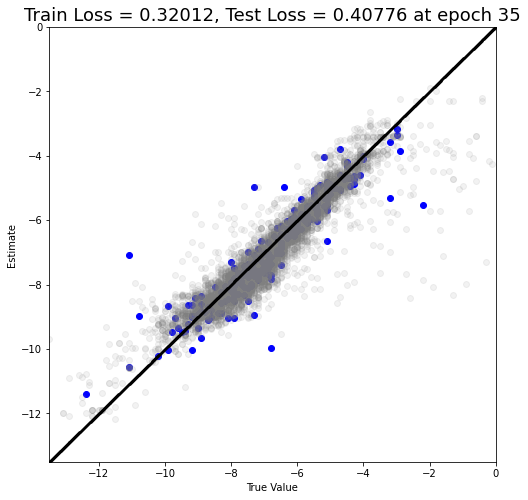

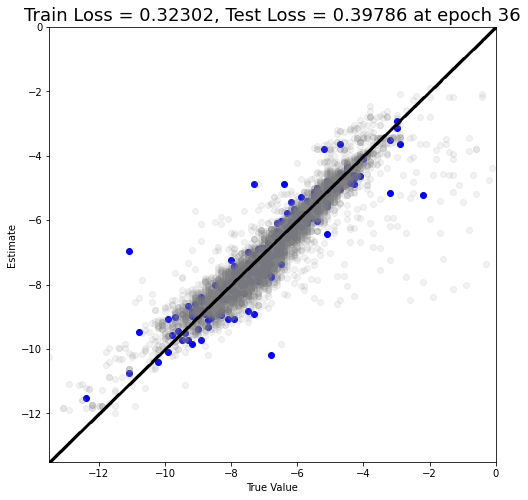

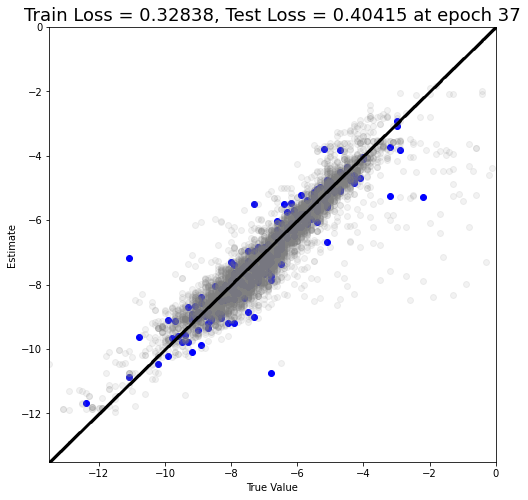

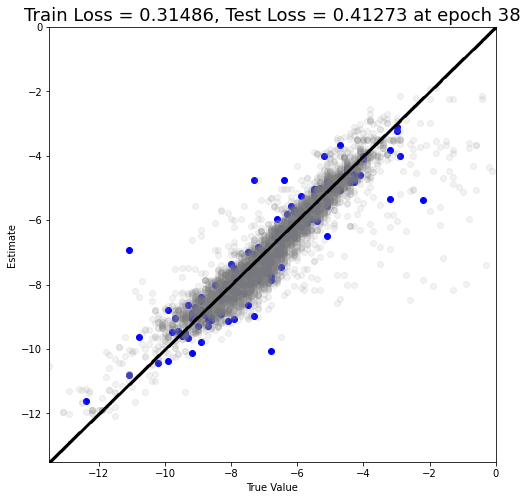

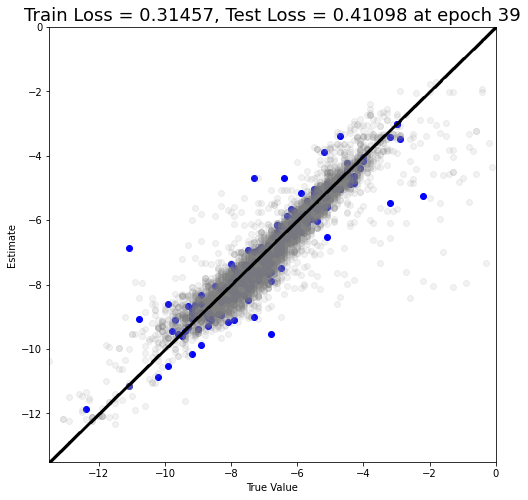

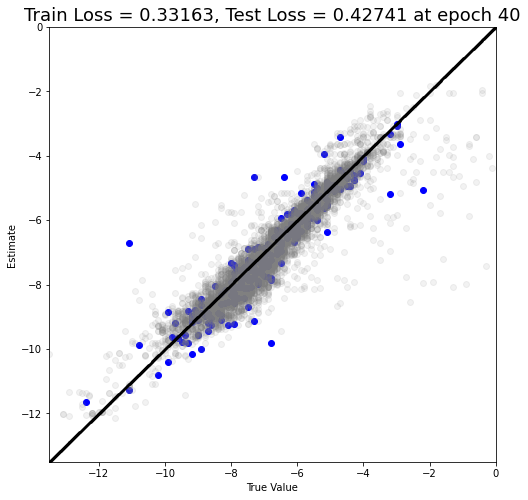

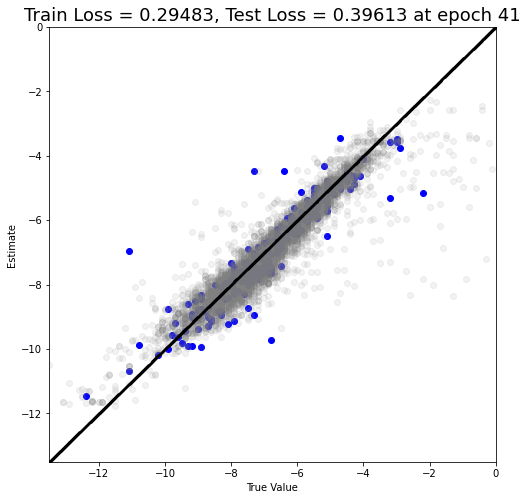

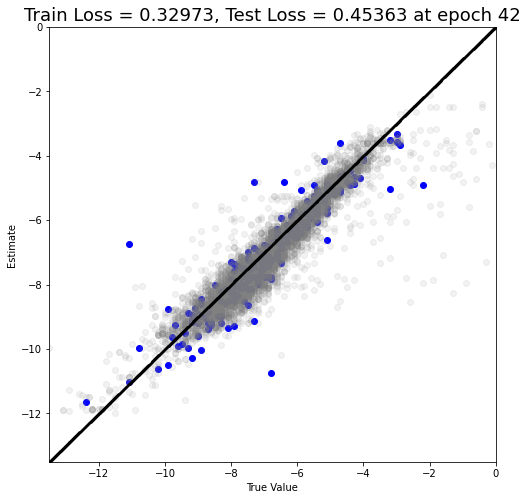

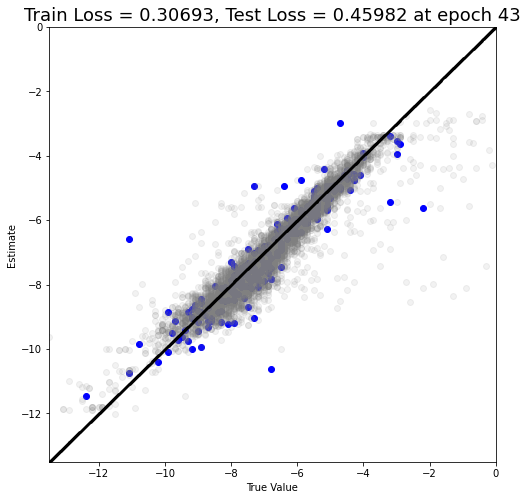

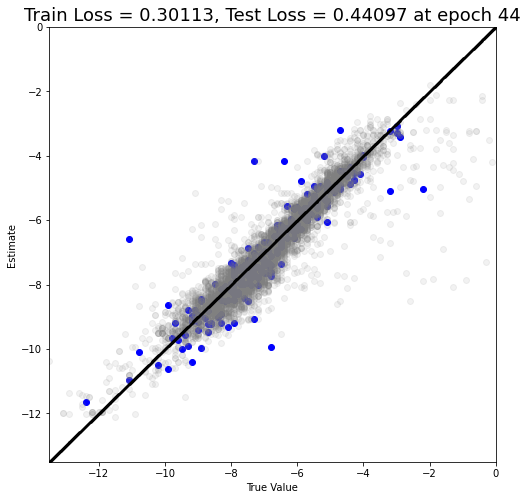

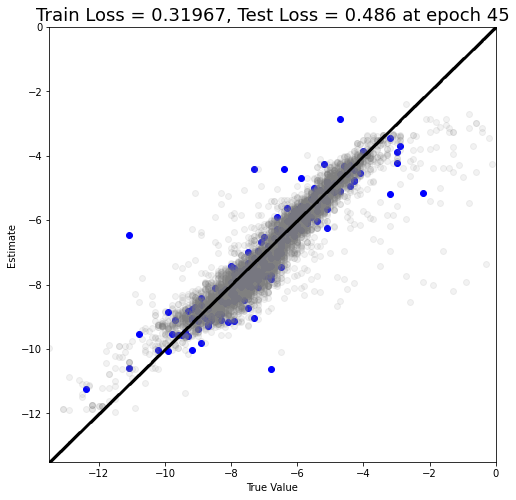

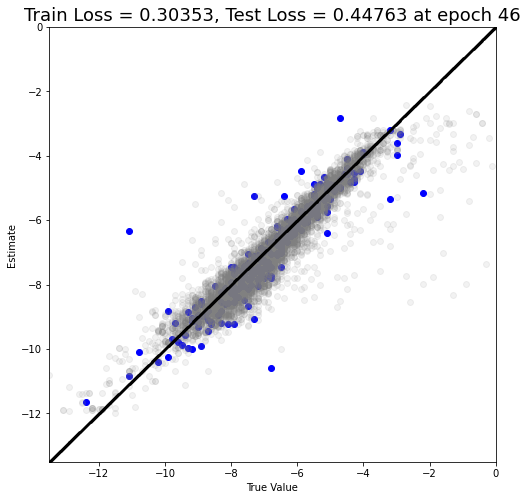

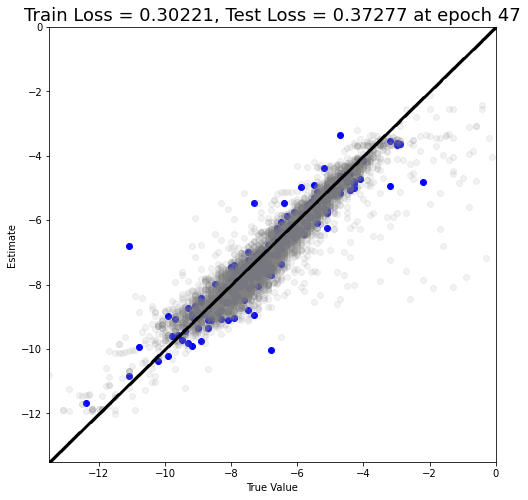

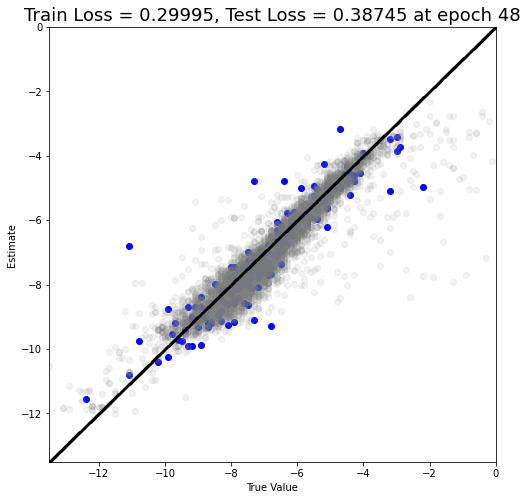

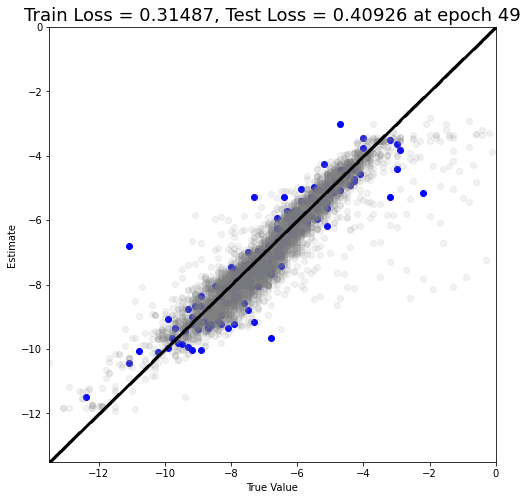

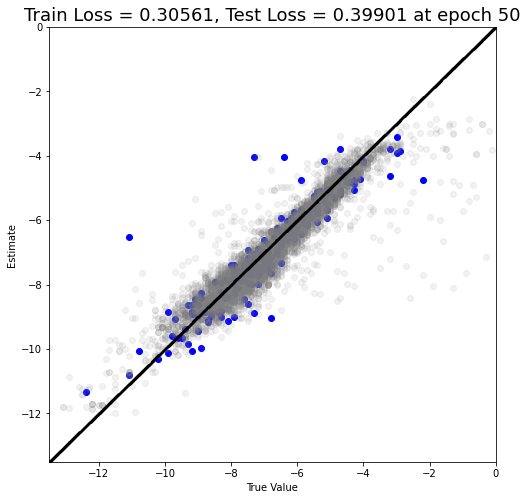

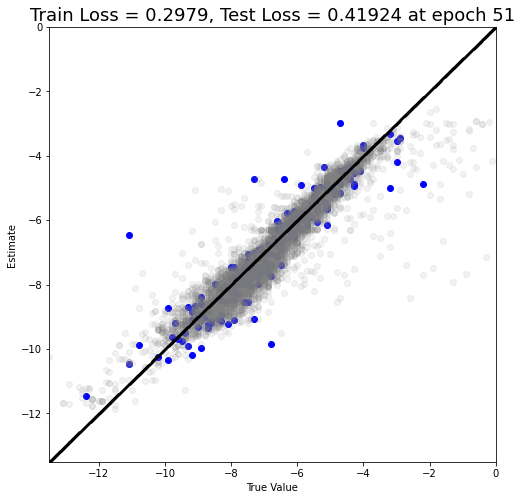

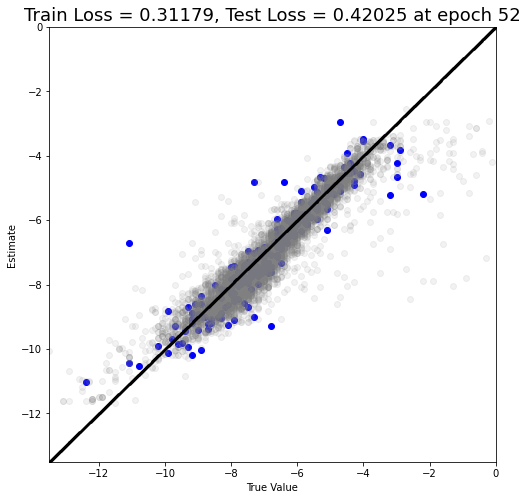

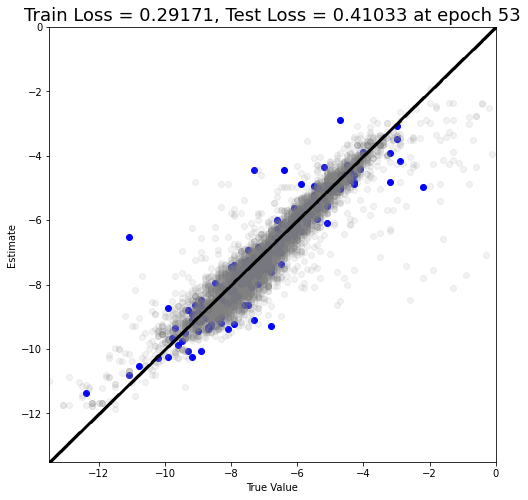

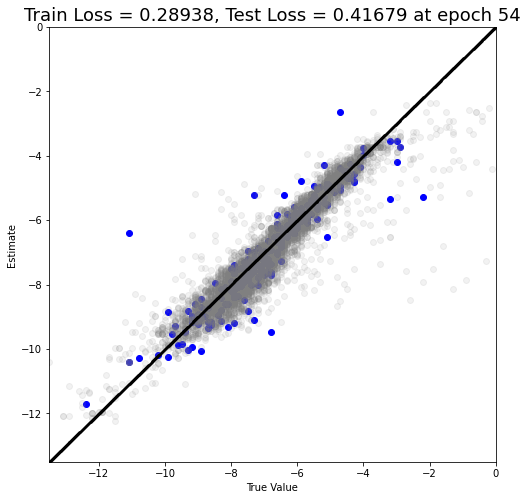

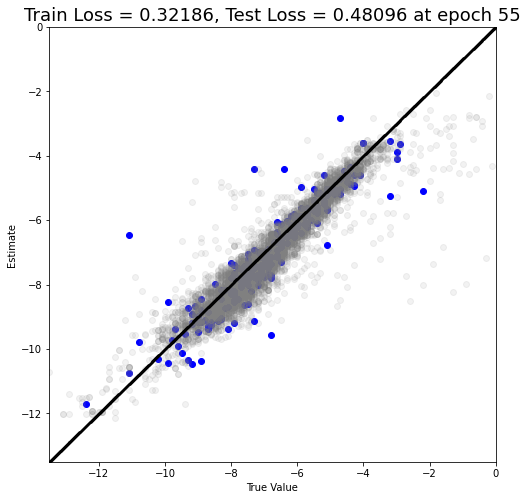

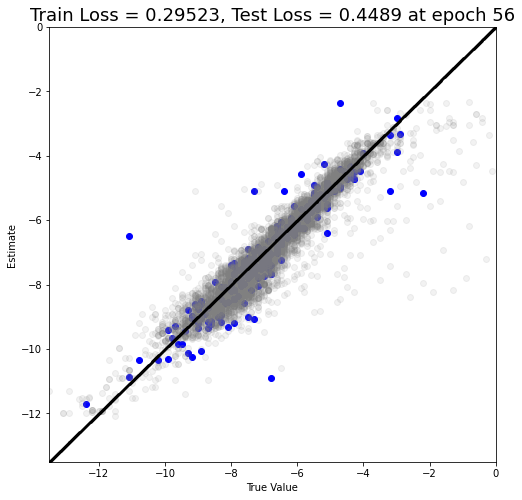

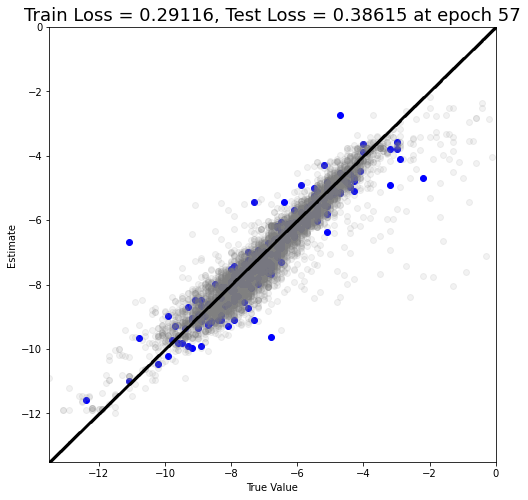

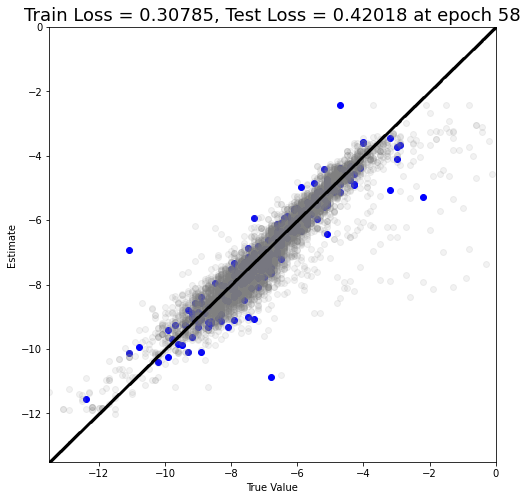

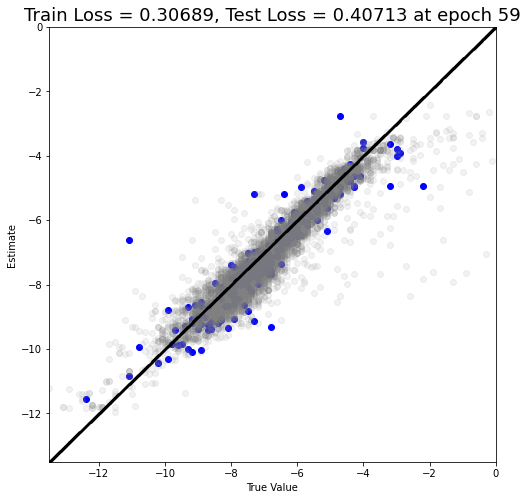

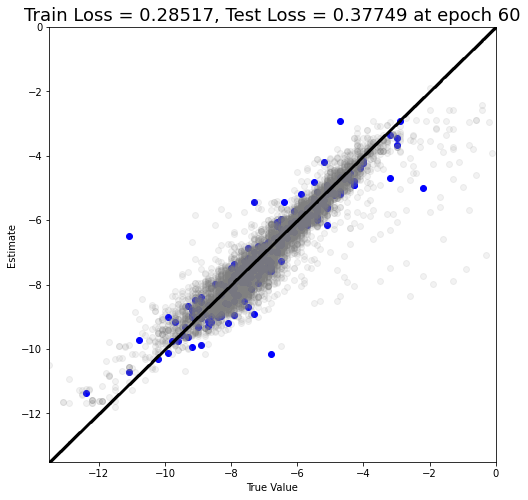

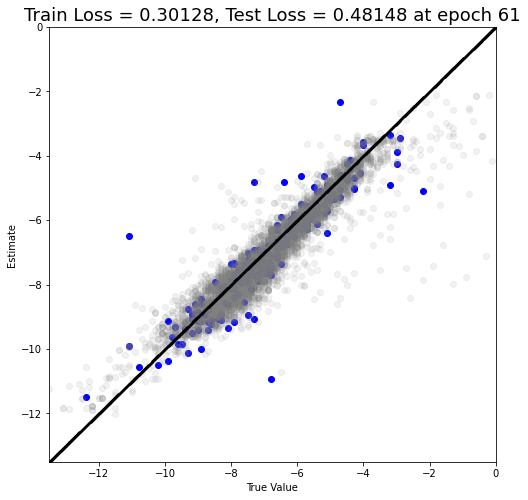

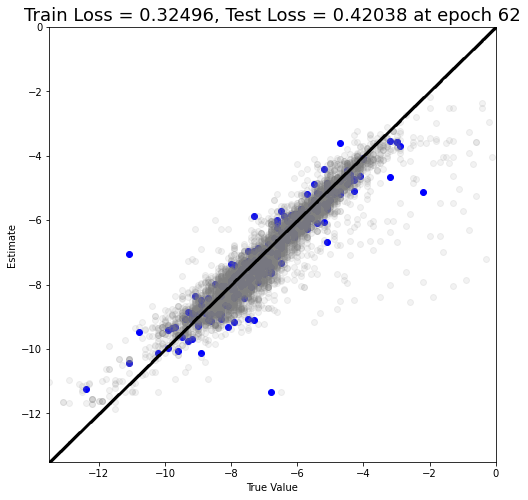

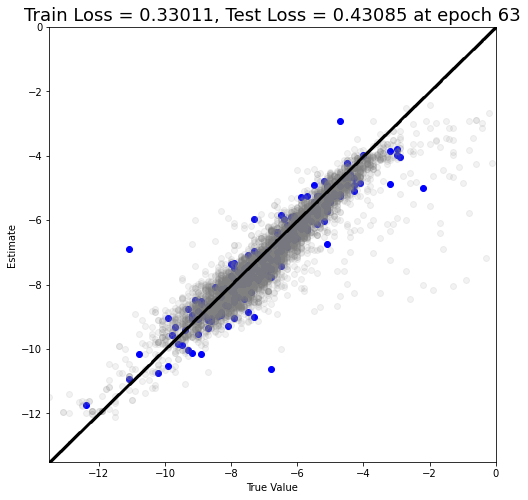

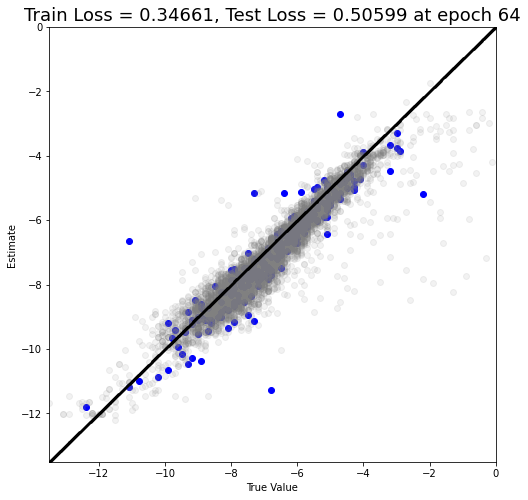

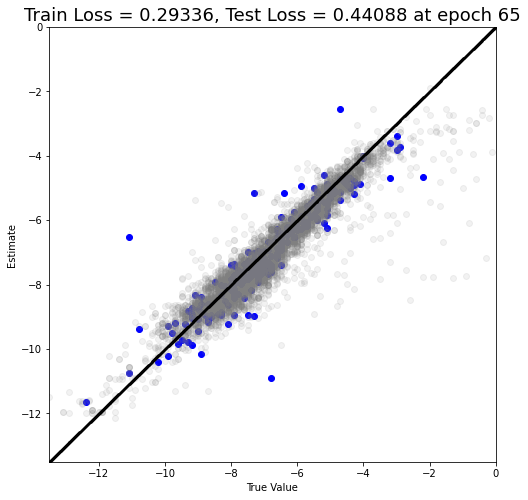

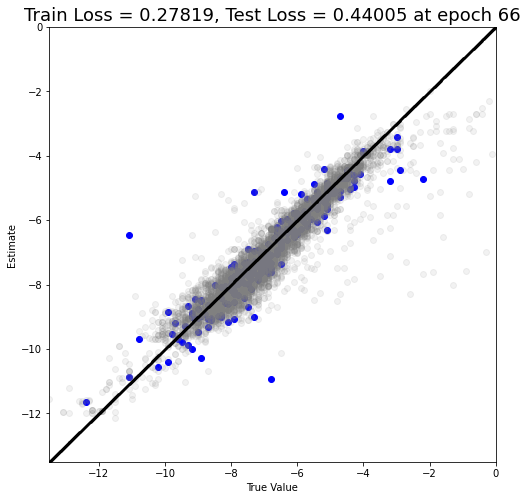

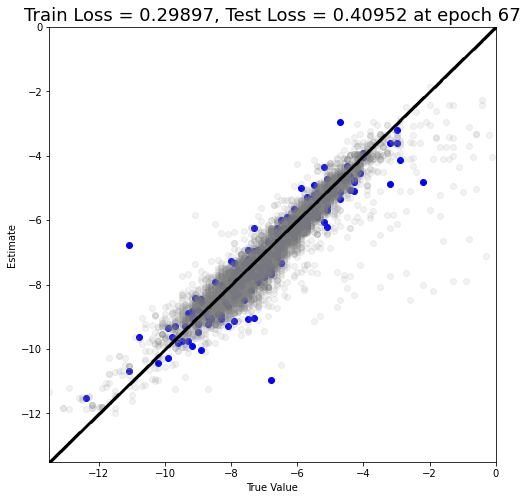

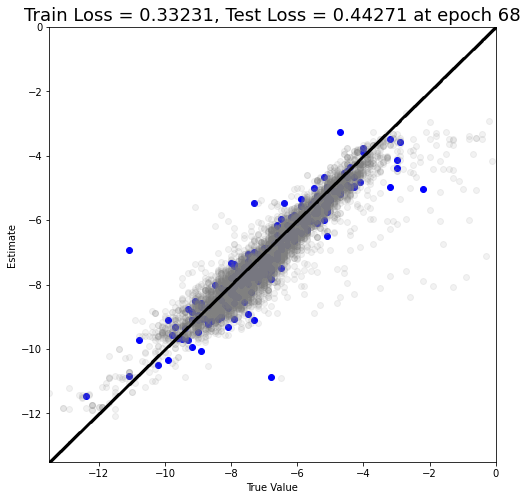

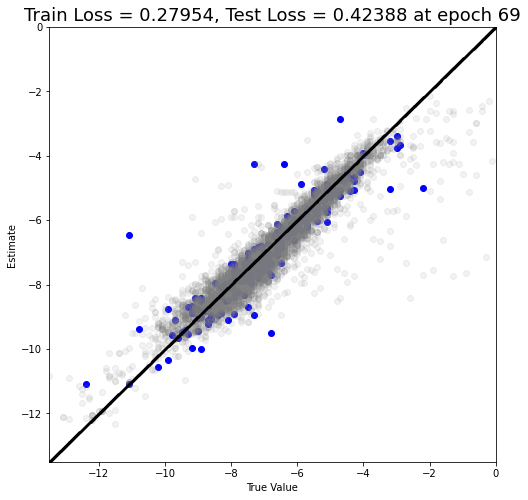

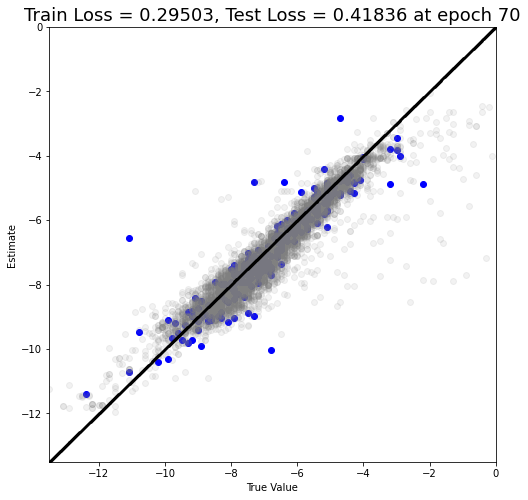

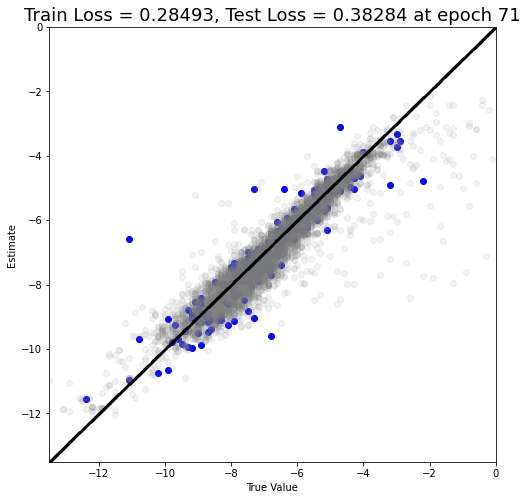

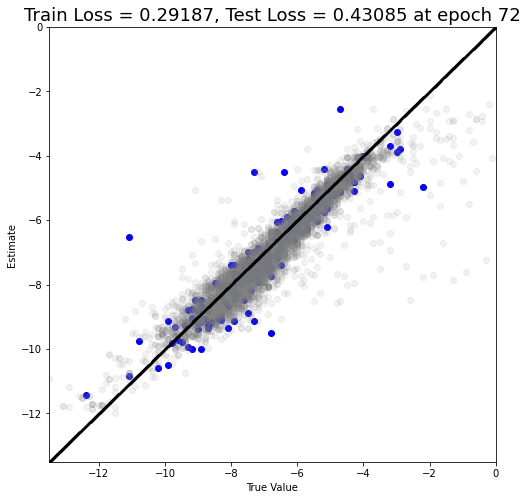

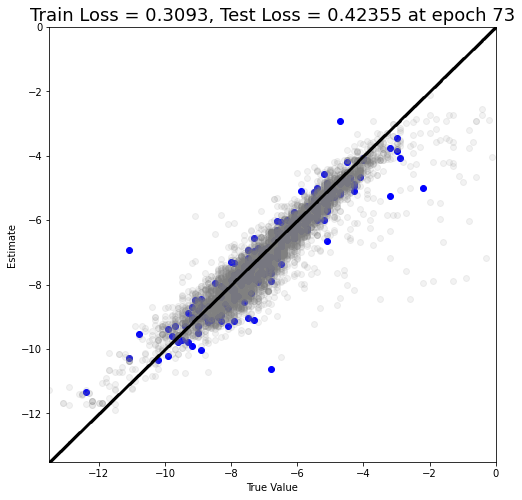

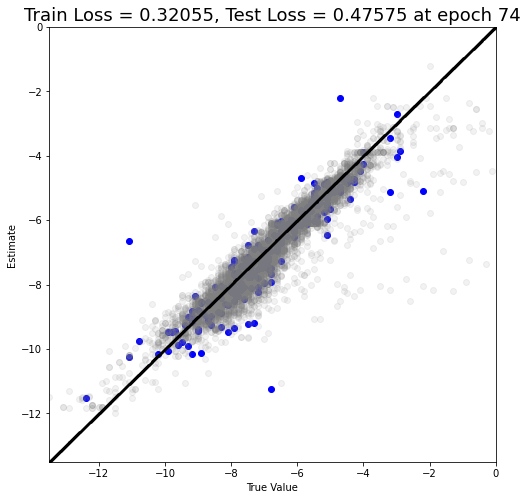

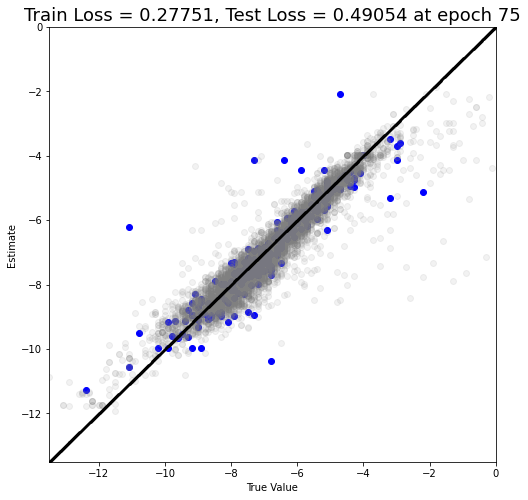

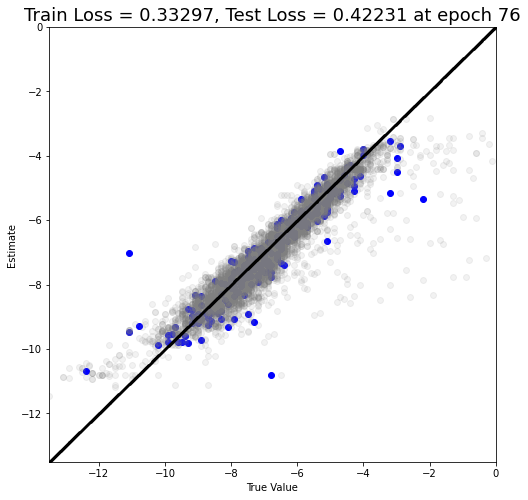

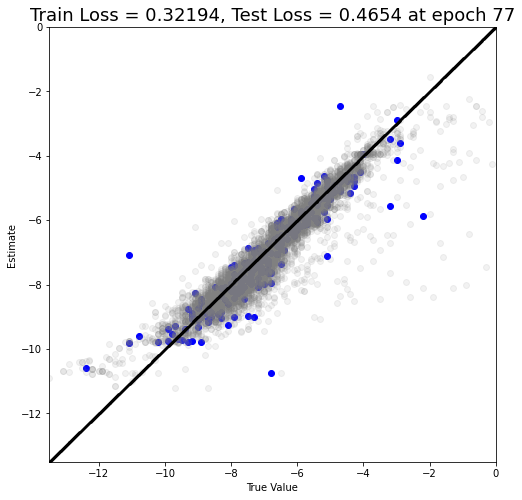

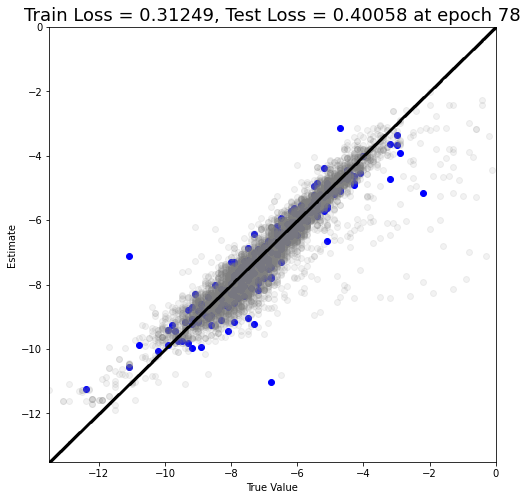

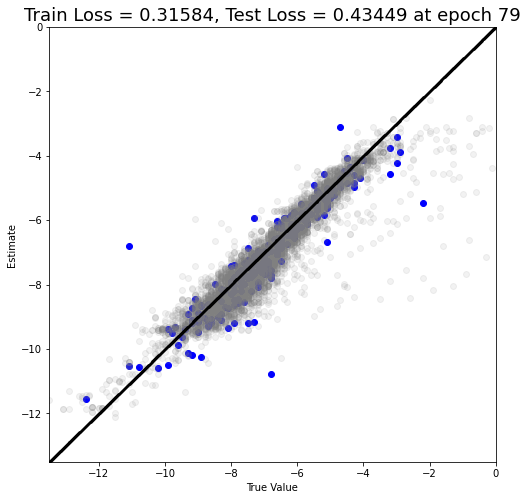

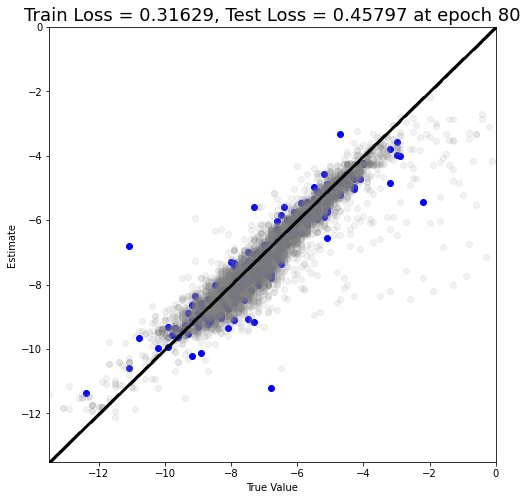

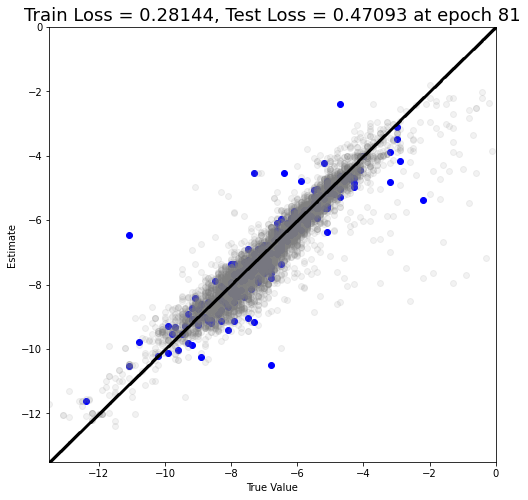

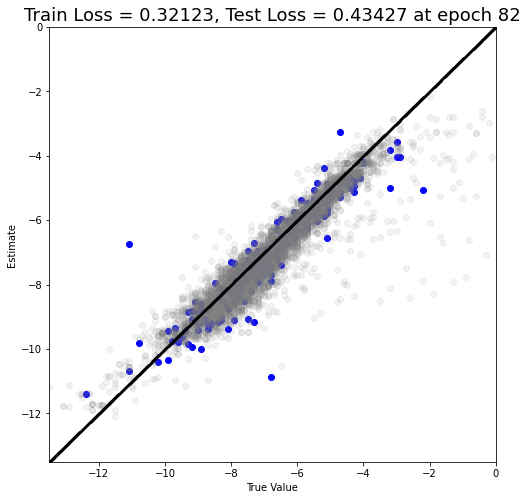

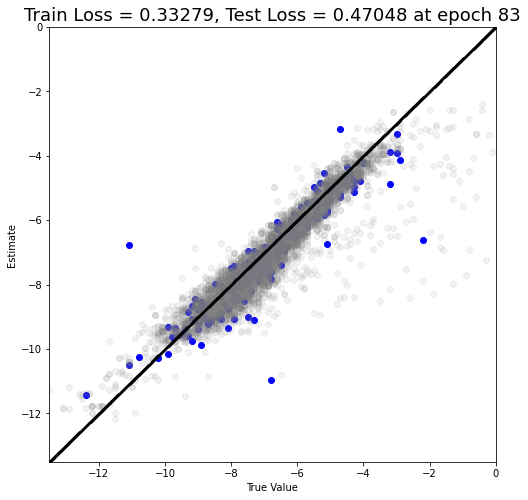

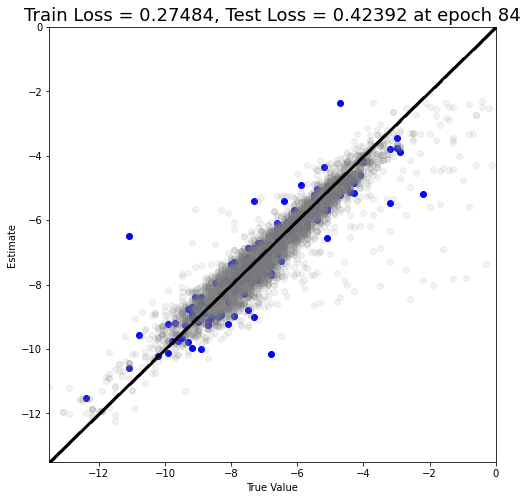

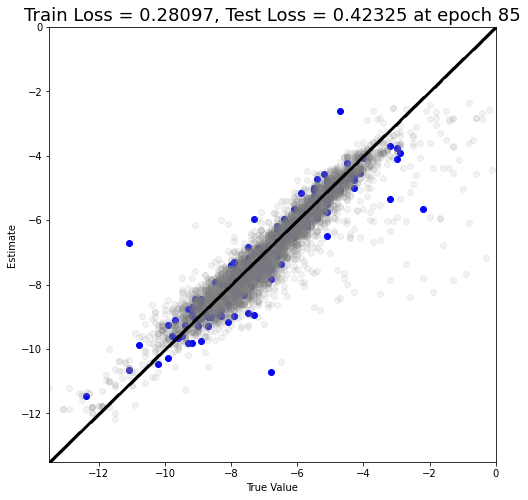

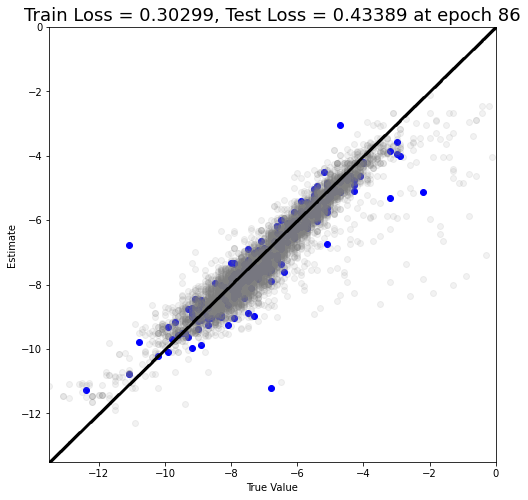

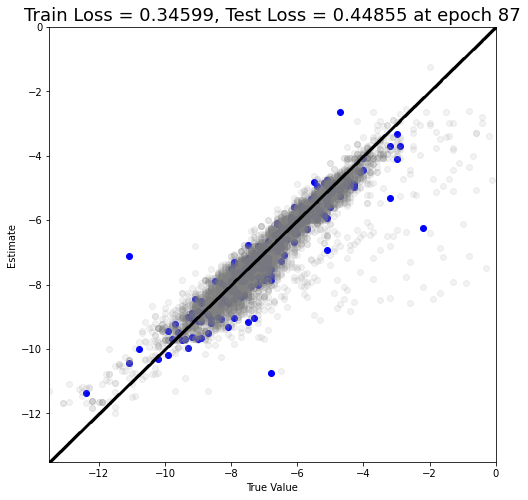

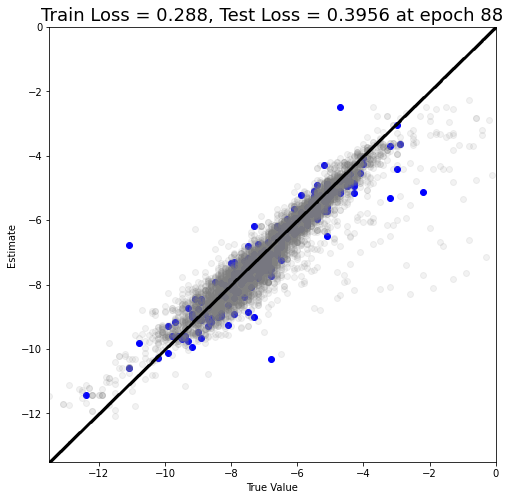

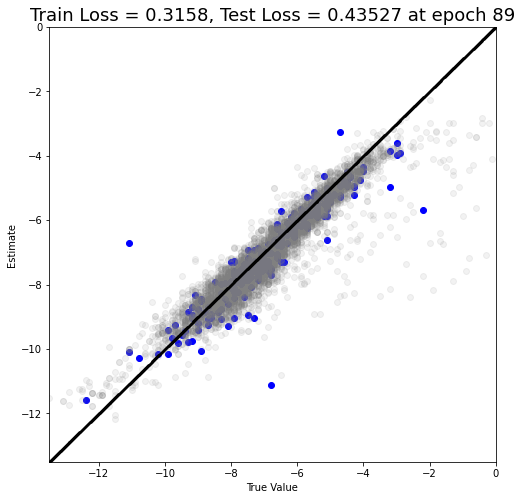

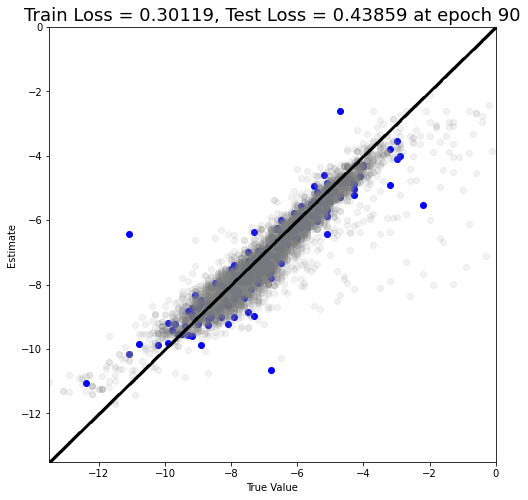

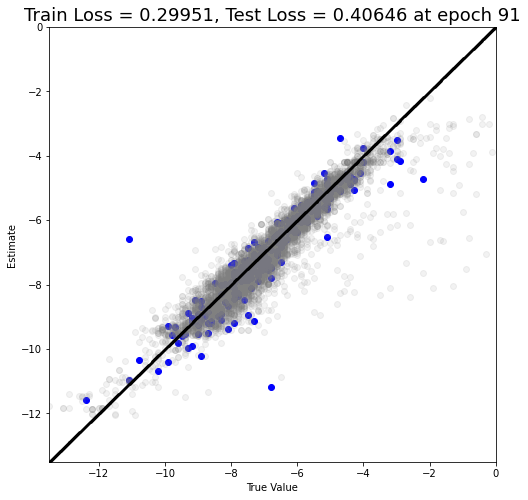

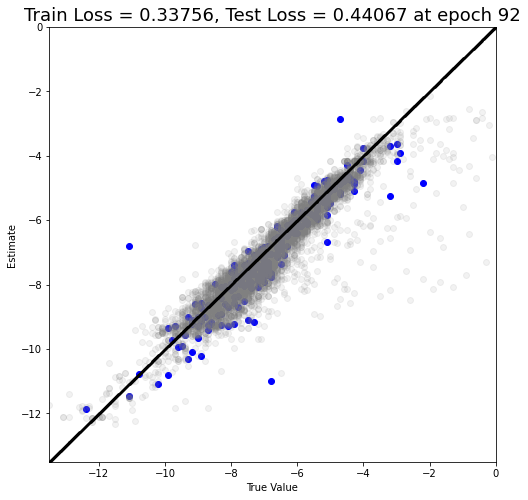

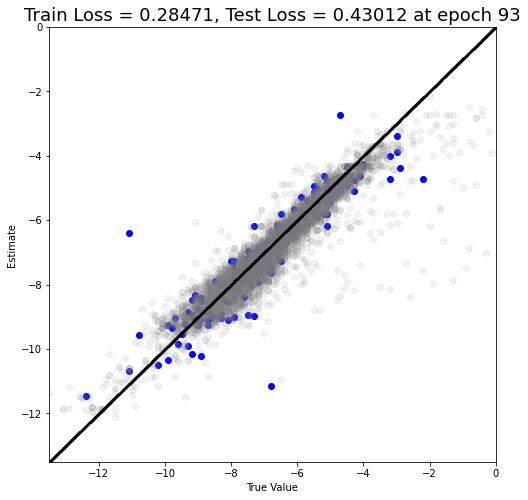

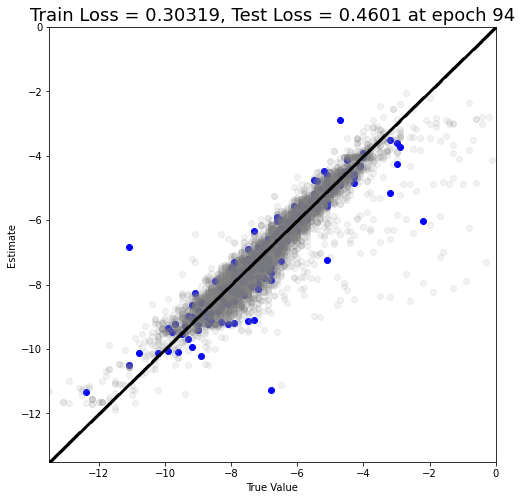

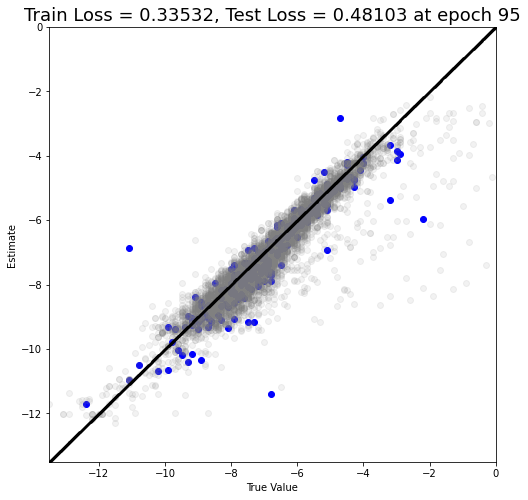

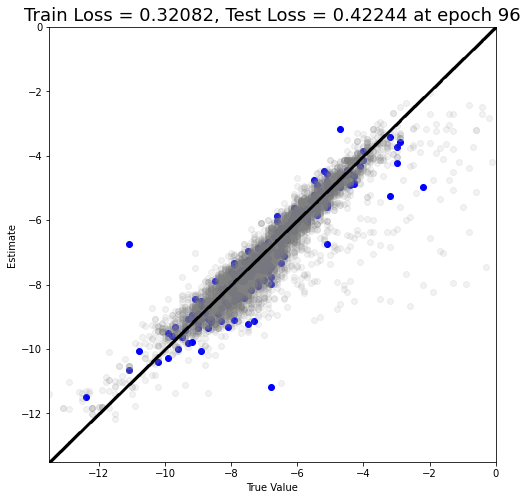

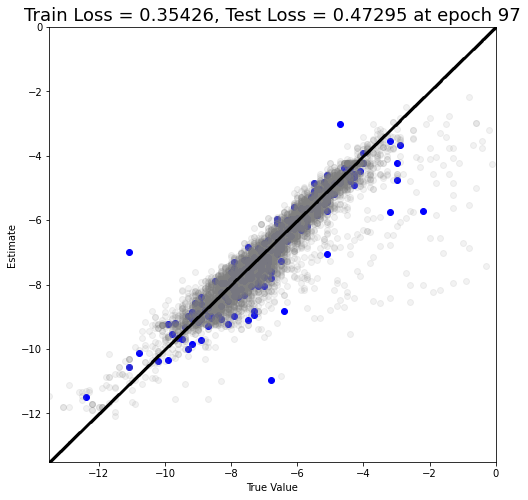

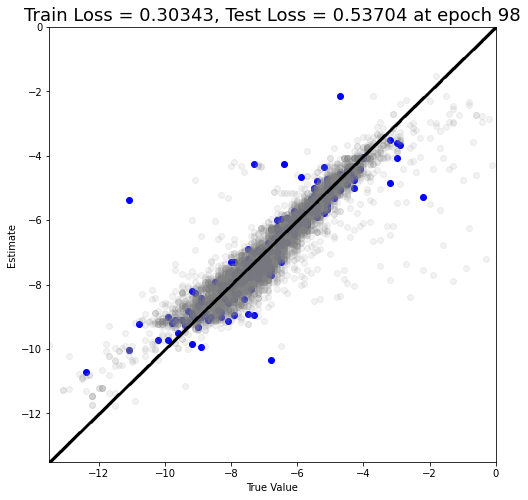

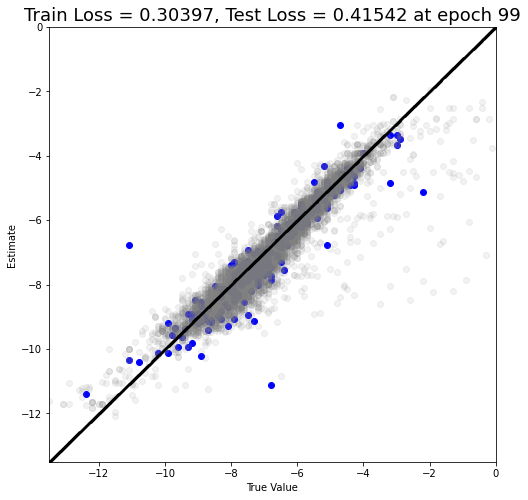

In [53]:
def plotModel():
    model.eval()
    output_train = model(train_vectors)
    trainloss = 0.0
    for j, x in enumerate(output_train):
        x_pred = float(x.cpu().detach().numpy())
        x_real = train_VINA[j].cpu().detach().numpy()
        #print(x_pred)
        #print(x_real)
        trainloss += np.square(-13.5*(x_real - x_pred) )
    trainloss = trainloss/len(output_train)
    # print("MSE Train Loss: " + str(trainloss))

    output_test = model(test_vectors)
    testloss = 0.0
    for j, x in enumerate(output_test):
        x_pred = float(x.cpu().detach().numpy())
        x_real = test_VINA[j].cpu().detach().numpy()
        #print(x_pred)
        #print(x_real)
        testloss += np.square(-13.5*(x_real - x_pred) )
    testloss = testloss/len(output_test)
    # print("MSE Test Loss: " + str(testloss))

    
    fig, ax = plt.subplots()

    output_test = output_test.cpu().detach().numpy()
    output_test = [float(x) for x in output_test]

    output_train = output_train.cpu().detach().numpy()
    output_train = [float(x) for x in output_train]

    test_VINA_numpy = test_VINA.cpu().detach().numpy()
    train_VINA_numpy = train_VINA.cpu().detach().numpy()

    test_VINA_numpy = [-13.5*i for i in test_VINA_numpy]
    train_VINA_numpy = [-13.5*i for i in train_VINA_numpy]
    output_test = [-13.5*i for i in output_test]
    output_train = [-13.5*i for i in output_train]
    
    
    ax.scatter(test_VINA_numpy, output_test, color="blue")
    ax.scatter(train_VINA_numpy, output_train, color="grey", alpha=0.1)

    fig.set_size_inches(8, 8)

    ax.set_xlabel("True Value")
    ax.set_ylabel("Estimate")
    ax.set_title("Train Loss = " + str(round(trainloss, 5)) +", Test Loss = " + str(round(testloss, 5)) + " at epoch " + str(i), fontsize=18 )
    
    line = np.arange(-13.5,0, 0.01)

    ax.scatter(line, line, color="black", s=2)
    ax.set_xlim([-13.5,0])
    ax.set_ylim([-13.5,0])

    plt.show()


for i in range(num_epochs):
    model.train()
    # loss = loss_fn(pred_cnsmpo, train_cnsmpo)
    loss_total = 0
    for j, v in enumerate(train_vectors):
        pred_VINA = model(v)
        loss = loss_fn(pred_VINA, train_VINA[j])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_total += loss.item()
    
    # print("MSE train loss at epoch " + str(i+1) + ": " + str(loss_total/len(train_vectors)))
    model.eval()
    output = model(test_vectors)
    testloss = 0.0
    for j, x in enumerate(output):
        x_pred = float(x.cpu().detach().numpy())
        x_real = test_VINA[j].cpu().detach().numpy()
        testloss += np.square(x_real - x_pred )
    testloss = testloss/len(output)
    # print("MSE test loss at epoch " + str(i+1) + ": " + str(testloss))
    # print("-"*20)
    plotModel()
    model.train()
     
    #optimizer.zero_grad()
    #loss.backward()
    #optimizer.step()
    
    
    

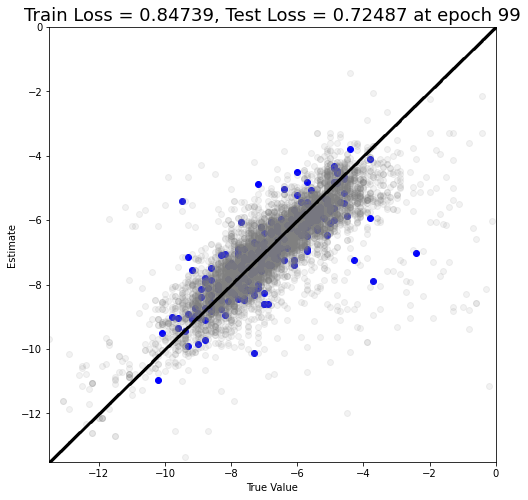

In [6]:
plotModel()

In [54]:
torch.save(model.state_dict(), "Pytorch-Models/vina-model/vina_model.pt")